# Linear Regression Model

## Notation

| Notation     | Description         | Python (if applicable) |
|:-------------|:--------------------|:-----------------------|
| $a$          | scalar, non bold    |                        |
| $\mathbf{a}$ | vector, bold        |                        |
| **Regression**|                    |                        |
| $\mathbf{x}$  | training example feature values| `x_train`  |
| $\mathbf{y}$  | training example targets | `y_train`        |
| $x^{(i)}$, $y^{(i)}$ | $i_{th}$ training example | `x_i`, `y_i`|
| $m$           | number of training examples | `m`           |
| $w$           | parameter/coefficient/weights: weight   | `w` |
| $b$           | parameter/intercept: bias | `b` |
| $f_{w,b}(x^{(i)})$ | the result of the model evaluation at $x^{(i)}$ parameterized by $w$, $b$: $f_{w,b}(x^{(i)})=wx^{(i)}+b$ | `f_wb` |


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [5]:
# x_train is the input variable
# y_train is the target
# at the moment, just two training examples: m = 2
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# x_train.shape returns a python tuple with an entry for each dimension
# x_train.shape[0] is the length of the array and number of examples
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

Number of training examples is: 2


## Cost function

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

In [9]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray (m,)): data, m examples (NumPy n-dimensional array of shape (m,))
        w,b (scalar):     model parameters (an argument without dimensions, just a magnitude)
    Returns:
        f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [10]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression
    Args:
        x (ndarray (m,)): data, m examples
        y (ndarray (m,)): target values
        w, b (scalar)   : model parameters
    Returns:
        total_cost (float): the cost of using w,b as the parameters for linear regression
                            to fit the data points in x and y
    """
    m = x.shape[0]
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost

    total_cost = (1/(2*m)) * cost_sum
    return total_cost

In [11]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [12]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

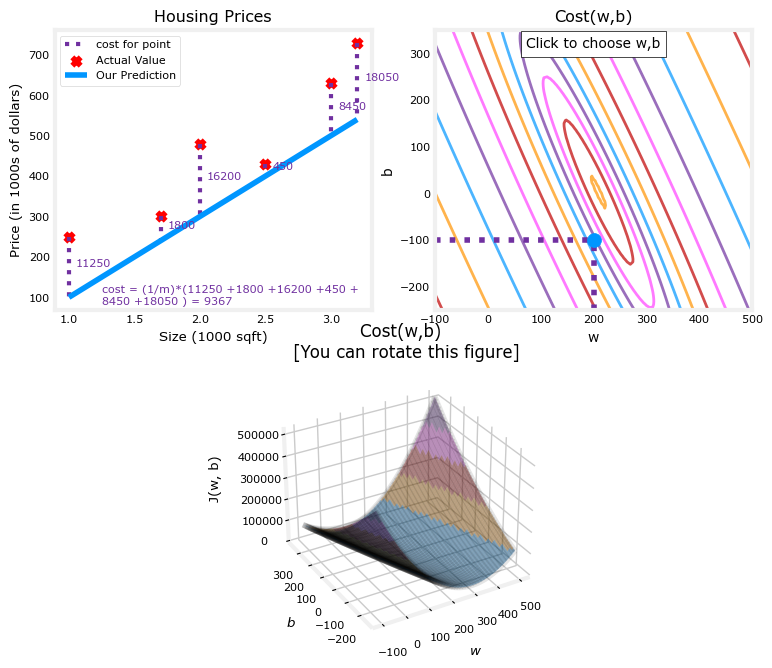

In [14]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

### Convex surface

Because the cost function **squares** the error, it ensures 